In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
os.chdir("/data/phillip_guo/mechanistic-unlearning")

# Single Run Checks

In [2]:
# make sure we can load all results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/models/model_metrics.pkl", "rb") as f:
    model_metrics = pickle.load(f)

print(model_metrics)

{'train_losses': defaultdict(<class 'list'>, {'sports_injection': [6.974935352802277, 1.4048134610056877, 1.467210553586483, 1.9404913559556007, 2.953827030956745, 2.562726303935051, 1.8945034518837929, 1.5727769024670124, 1.3466939628124237, 1.2378684654831886, 1.0626458618789911, 0.9502419801428914, 0.8281610421836376, 0.6334257782436907, 0.4031635837163776, 0.3258411968126893, 0.24862539628520608, 0.16733198368456215, 0.11130284788669087, 0.06506813461601269, 0.034396297713101376, 0.017716262965222995, 0.014380281154444674, 0.010301341535523534, 0.008037569885345874, 0.006663800826572697, 0.0050632550974114565, 0.004411264750160626, 0.0037635924554706435, 0.00429813386836031, 0.0028190481762067066, 0.0024764158806647174, 0.00369053417671239, 0.0032051348862296436, 0.00259364736302814, 0.0027564016745600384, 0.002978003127282136, 0.002585686404017906, 0.002599983744403289, 0.002636210357195523, 0.002609482779917016, 0.002636524211993674, 0.002567789174918289, 0.002698986852010421, 0.

In [3]:
model_metrics["adversarial_evals"][49]

{'Normal': {'forget': 0.13461697101593018, 'maintain': 0.9767621636390686},
 'MC': {'forget': 0.48449456691741943, 'maintain': 0.9049231767654418},
 'Normal_Injected': {'forget': 0.8407975077629088,
  'maintain': 0.01574753206223249},
 'MC_Injected': {'forget': 0.3880510449409485,
  'maintain': 0.03205777481198311}}

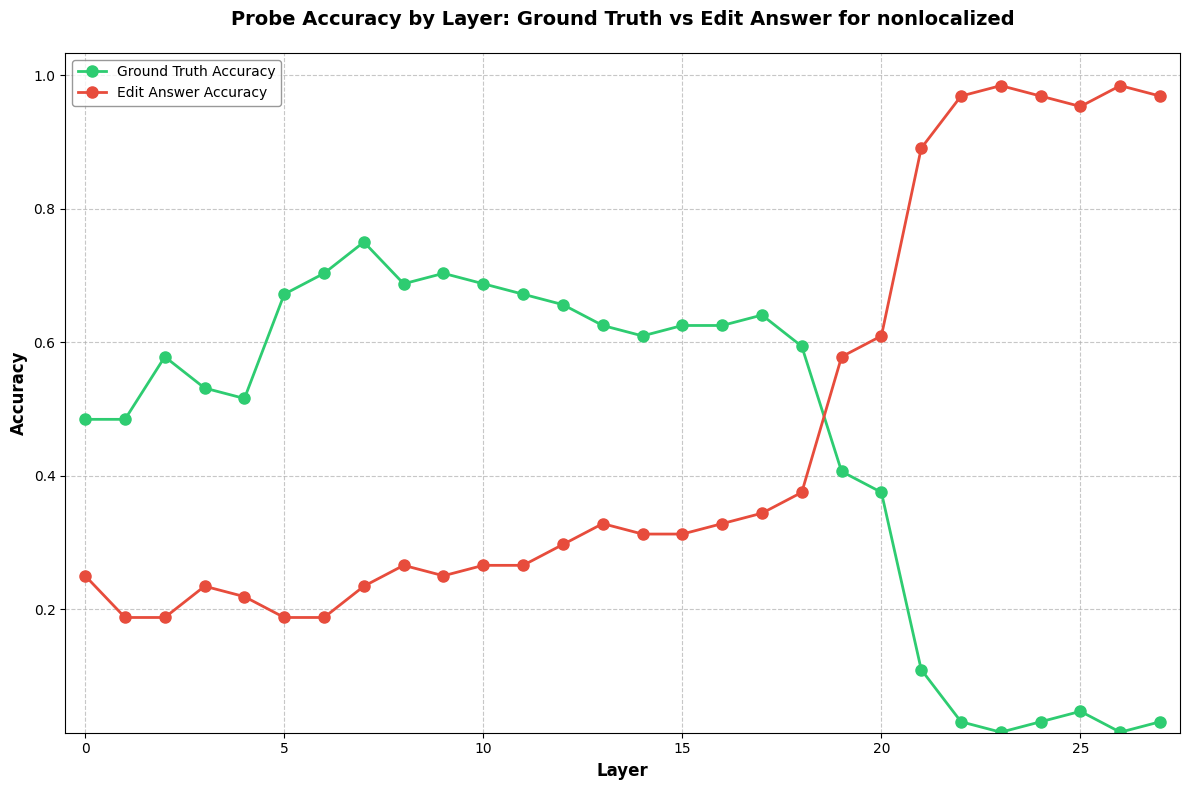

In [4]:
# probing results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/probing_results.pkl", "rb") as f:
    probing_results = pickle.load(f)
ground_truth_accs = probing_results["forget_ground_truth_accs"]
edit_accs = probing_results["forget_edit_accs"]
# Set style
# plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))

localization_type = "nonlocalized"
n_layers = 28
# Plot lines
layers = range(n_layers)
ax.plot(layers, ground_truth_accs, 'o-', label='Ground Truth Accuracy', linewidth=2, markersize=8, color='#2ecc71')
ax.plot(layers, edit_accs, 'o-', label='Edit Answer Accuracy', linewidth=2, markersize=8, color='#e74c3c')

# Customize plot
ax.set_xlabel('Layer', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title(f'Probe Accuracy by Layer: Ground Truth vs Edit Answer for {localization_type}', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')

# Set axis limits with some padding
ax.set_xlim(-0.5, n_layers-0.5)
ax.set_ylim(min(min(ground_truth_accs), min(edit_accs))*0.95, 
            max(max(ground_truth_accs), max(edit_accs))*1.05)

# Add minor gridlines
ax.grid(True, which='minor', linestyle=':', alpha=0.4)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Tight layout
plt.tight_layout()
plt.show()

In [5]:
# relearning results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/relearning_results.pkl", "rb") as f:
    relearning_results = pickle.load(f)

print(relearning_results)

{'relearning_regular_results': {'forget_sport_ce': 0.8472292423248291, 'forget_sport_acc': 0.43855951726436615, 'maintain_sports_ce': 1.7995074391365051, 'maintain_sports_acc': 0.5128936171531677}, 'relearning_train_losses': defaultdict(<class 'list'>, {'relearn_athletes': [12.500282287597656, 3.0498721599578857, 3.8309733867645264, 2.5583434104919434, 1.9976208209991455, 1.2468030452728271, 0.8732609748840332, 1.3434317111968994, 1.0687249898910522, 1.2566089630126953, 0.9161591529846191, 1.6557828187942505, 2.28537654876709, 1.4013135433197021, 1.425411581993103, 1.2488219738006592, 0.9448820948600769, 0.606001615524292, 0.5218233466148376, 0.5292930603027344], 'maintain_athletes': [0.000273023615591228, 0.27189937233924866, 2.0449371337890625, 0.7996240854263306, 1.1038695573806763, 1.308397650718689, 1.0421937704086304, 0.7652674913406372, 2.2600436210632324, 1.458235740661621, 0.8418788313865662, 1.1231648921966553, 1.297147274017334, 1.3170653581619263, 0.7315736413002014, 0.6212

In [6]:
len(relearning_results["relearning_test_losses"])

21

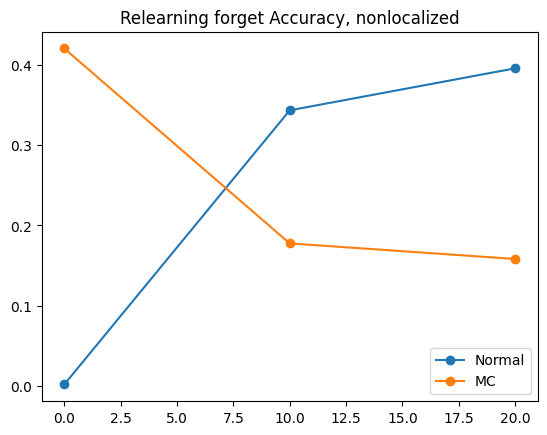

In [7]:
for task_name, task_split in [("Normal", "forget"), ("MC", "forget")]:
    x_vals = []
    y_vals = []
    for idx, point in enumerate(relearning_results["relearning_test_losses"]):
        if len(point) > 0:
            x_vals.append(idx)
            y_vals.append(point['adversarial'][task_name][task_split])
    plt.plot(x_vals, y_vals, label=task_name, marker="o")
plt.title(f"Relearning {task_split} Accuracy, {localization_type}")
plt.legend()
plt.show()

In [8]:
# softprompt results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/softprompt_metrics.pkl", "rb") as f:
    softprompt_results = pickle.load(f)

print(softprompt_results)


[{'forget_acc': 0.3561830222606659, 'forget_acc_with_injected': 0.2893925905227661, 'maintain_acc': 0.29938408732414246, 'loss_over_time': [{'toward': 8.914156913757324, 'total': 8.914156913757324}, {'toward': 10.540573120117188, 'total': 10.540573120117188}, {'toward': 8.573058128356934, 'total': 8.573058128356934}, {'toward': 8.238524436950684, 'total': 8.238524436950684}, {'toward': 6.780226707458496, 'total': 6.780226707458496}, {'toward': 5.64469051361084, 'total': 5.64469051361084}, {'toward': 5.012556552886963, 'total': 5.012556552886963}, {'toward': 3.6373887062072754, 'total': 3.6373887062072754}, {'toward': 3.501967430114746, 'total': 3.501967430114746}, {'toward': 2.5406384468078613, 'total': 2.5406384468078613}, {'toward': 1.9313119649887085, 'total': 1.9313119649887085}, {'toward': 2.7064712047576904, 'total': 2.7064712047576904}, {'toward': 2.1678171157836914, 'total': 2.1678171157836914}, {'toward': 2.4232044219970703, 'total': 2.4232044219970703}, {'toward': 2.910437345

In [9]:
sum(result["forget_acc"] for result in softprompt_results) / len(softprompt_results)

0.3404291570186615

# Multi Run Graphs

## Train/Test Statistics

In [10]:
localization_types = {"localized_ap": "Localized AP", "localized_ct": "Localized CT", "localized_ap_mlps": "Localized AP MLPs", "localized_ct_mlps": "Localized CT MLPs", "manual_interp": "Manual Interp", "random": "Random", "all_mlps": "All MLPs", "nonlocalized": "Non-Localized", "random_mlps": "Random MLPs"}
model_names = {"gemma": "Gemma 7b", "gemma2": "Gemma 2 9b", "llama3": "Llama 3 8b"}#, }
forget_splits = {"16": "16 Random Athletes", "64": "64 Random Athletes"}
inject_labels = {"random_without_golf": "Random (No Golf)"}
run_ids = ["1"]
final_epoch = 49

import itertools

# average over forget splits, inject labels, model names, and run_ids. For singular results, have only single elements
configs = list(itertools.product(model_names, forget_splits, inject_labels, run_ids))

test_losses_list = []
adversarial_evals_list = []
# side_effects_evals_list = []
mmlu_evals_list = []

do_probing_evals = True
probing_evals_list = []

do_relearning_evals = False
relearning_evals_list = []

do_softprompt_evals = False
softprompt_evals_list = []

for localization_type in localization_types:
    aggregated_results = []
    # Convert iterator to list and wrap with tqdm for proper progress tracking
    for model_name, forget_split, inject_label, run_id in tqdm(configs, desc=f"Processing {localization_type}"):
        config_dir = {"localization_type": localization_types[localization_type], "model_name": model_name, "forget_split": forget_splits[forget_split], "inject_label": inject_labels[inject_label], "run_id": run_id}

        save_dir = f"results_rebuttal/{model_name}_forget_{forget_split}_inject_{inject_label}/{localization_type}_run{run_id}"
        with open(f"{save_dir}/models/model_metrics.pkl", "rb") as f:
            model_metrics = pickle.load(f)

        for task, value in model_metrics["test_losses"].items():
            test_losses_list.append({
                **config_dir,
                "task_name": task,
                "test_loss": value[-1]
            })
        
        for eval_type, results in model_metrics["adversarial_evals"][final_epoch].items():
            adversarial_evals_list.append({
                **config_dir,
                "eval_type": eval_type,
                "forget": results["forget"],
                "maintain": results["maintain"]
            })
        
        with open(f"{save_dir}/full_capability_dict.pkl", "rb") as f:
            full_capability_dict = pickle.load(f)
        
        mmlu_evals_list.append({
            **config_dir,
            "mmlu": full_capability_dict["results"]["mmlu"]["acc,none"]
        })

        if do_probing_evals:
            with open(f"{save_dir}/results/probing_results.pkl", "rb") as f:
                probing_results = pickle.load(f)
            for layer in range(len(probing_results["forget_ground_truth_accs"])):
                probing_evals_list.append({
                    **config_dir,
                    "layer": layer,
                    "forget_ground_truth_acc": probing_results["forget_ground_truth_accs"][layer],
                    "forget_edit_acc": probing_results["forget_edit_accs"][layer],
                    "maintain_train_acc": probing_results["maintain_train_accs"][layer],
                    "maintain_test_acc": probing_results["maintain_test_accs"][layer]
                })


        if do_relearning_evals:
            with open(f"{save_dir}/results/relearning_results.pkl", "rb") as f:
                relearning_results = pickle.load(f)
            for step in range(len(relearning_results["relearning_test_losses"])):
                relearning_dict = relearning_results["relearning_test_losses"][step]
                if len(relearning_dict) > 0:
                    current_dict = {
                        **config_dir,
                        "step": step,
                        "mmlu": relearning_dict["MMLU"]["MMLU"]
                    }
                    for adversarial_eval_type in relearning_dict["adversarial"].keys():
                        for split in ["forget", "maintain"]:
                            current_dict[f"{adversarial_eval_type}_{split}"] = relearning_dict["adversarial"][adversarial_eval_type][split]
                    relearning_evals_list.append(current_dict)
        
        if do_softprompt_evals:
            with open(f"{save_dir}/results/softprompt_metrics.pkl", "rb") as f:
                softprompt_results = pickle.load(f)
            
            for softprompt_iter in range(len(softprompt_results)):
                softprompt_evals_list.append({
                    **config_dir,
                    "softprompt_iter": softprompt_iter,
                    "forget_acc": softprompt_results[softprompt_iter]["forget_acc"],
                    "forget_acc_with_injected": softprompt_results[softprompt_iter]["forget_acc_with_injected"],
                    "maintain_acc": softprompt_results[softprompt_iter]["maintain_acc"]
                })
            # for task_name, task_split in [("Normal", "forget"), ("MC", "forget")]:
            #     softprompt_evals_list.append({

Processing localized_ap:   0%|          | 0/6 [00:00<?, ?it/s]

Processing localized_ct:   0%|          | 0/6 [00:00<?, ?it/s]

Processing localized_ap_mlps:   0%|          | 0/6 [00:00<?, ?it/s]

Processing localized_ct_mlps:   0%|          | 0/6 [00:00<?, ?it/s]

Processing manual_interp:   0%|          | 0/6 [00:00<?, ?it/s]

Processing random:   0%|          | 0/6 [00:00<?, ?it/s]

Processing all_mlps:   0%|          | 0/6 [00:00<?, ?it/s]

Processing nonlocalized:   0%|          | 0/6 [00:00<?, ?it/s]

Processing random_mlps:   0%|          | 0/6 [00:00<?, ?it/s]

In [11]:
# convert all to dataframes
test_losses_df = pd.DataFrame(test_losses_list)
adversarial_evals_df = pd.DataFrame(adversarial_evals_list)
mmlu_evals_df = pd.DataFrame(mmlu_evals_list)
if do_probing_evals:
    probing_evals_df = pd.DataFrame(probing_evals_list)
if do_relearning_evals:
    relearning_evals_df = pd.DataFrame(relearning_evals_list)
if do_softprompt_evals:
    softprompt_evals_df = pd.DataFrame(softprompt_evals_list)

In [12]:
# Define colors for each localization type
colors = {"Localized AP": "#e74c3c", "Localized CT": "#2ecc71", "Localized AP MLPs": "#3498db", "Localized CT MLPs": "#f1c40f", "Manual Interp": "#9b59b6", "Random": "#1abc9c", "All MLPs": "#e67e22", "Non-Localized": "#e74c3c", "Random MLPs": "#2ecc71"}

### Test Evals

In [13]:
test_losses_df[test_losses_df["task_name"].isin(["forget_sport_accuracy", "maintain_sport_accuracy"])].groupby(["localization_type", "task_name"]).mean(numeric_only=True)

test_loss
localization_type task_name                         
All MLPs          forget_sport_accuracy     0.000918
                  maintain_sport_accuracy   0.988798
Localized AP      forget_sport_accuracy     0.137491
                  maintain_sport_accuracy   0.800962
Localized AP MLPs forget_sport_accuracy     0.048092
                  maintain_sport_accuracy   0.774785
Localized CT      forget_sport_accuracy     0.010640
                  maintain_sport_accuracy   0.989391
Localized CT MLPs forget_sport_accuracy     0.008094
                  maintain_sport_accuracy   0.883505
Manual Interp     forget_sport_accuracy     0.000026
                  maintain_sport_accuracy   0.993039
Non-Localized     forget_sport_accuracy     0.000275
                  maintain_sport_accuracy   0.974313
Random            forget_sport_accuracy     0.002211
                  maintain_sport_accuracy   0.990111
Random MLPs       forget_sport_accuracy     0.000076
                  maintain_sport_accuracy   0.990122

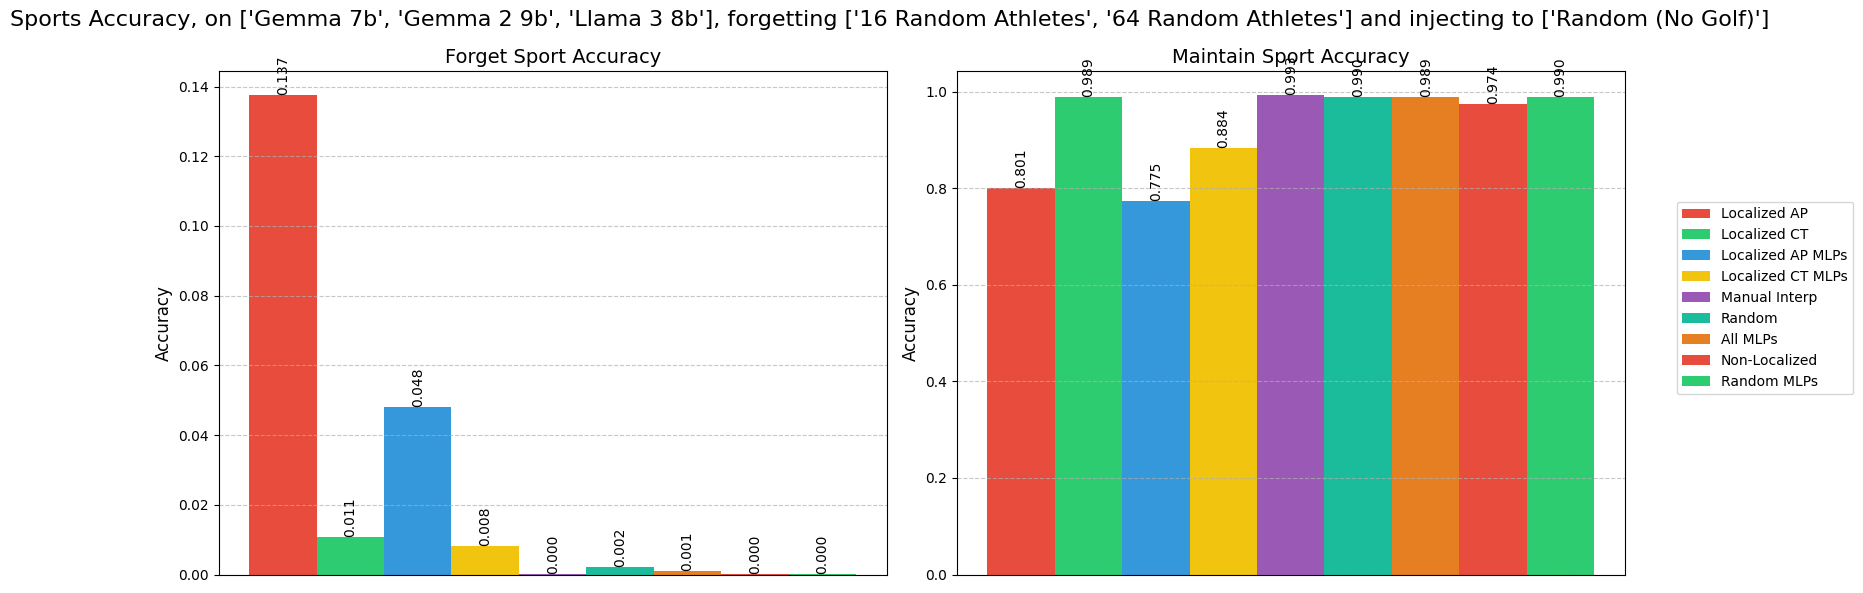

In [14]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = test_losses_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Only one bar position per subplot

# Plot Forget Sport Accuracy
for idx, loc_type in enumerate(loc_types):
    data = test_losses_df[test_losses_df['localization_type'] == loc_type]
    forget_acc = data[data['task_name'] == 'forget_sport_accuracy']['test_loss'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax1.bar(bar_position, forget_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax1.text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Maintain Sport Accuracy
for idx, loc_type in enumerate(loc_types):
    data = test_losses_df[test_losses_df['localization_type'] == loc_type]
    maintain_acc = data[data['task_name'] == 'maintain_sport_accuracy']['test_loss'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax2.bar(bar_position, maintain_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax2.text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Customize plots
ax1.set_ylabel('Accuracy', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Forget Sport Accuracy', fontsize=14)
ax2.set_title('Maintain Sport Accuracy', fontsize=14)
plt.suptitle(f"Sports Accuracy, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=16)

# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Adversarial Evals

In [15]:
adversarial_evals_df.groupby(["localization_type", "eval_type"]).mean(numeric_only=True)

forget  maintain
localization_type eval_type                          
All MLPs          MC               0.229190  0.435145
                  MC_Injected      0.251799  0.094365
                  Normal           0.059602  0.885771
                  Normal_Injected  0.915054  0.064439
Localized AP      MC               0.712039  0.712072
                  MC_Injected      0.083000  0.087161
                  Normal           0.195950  0.713161
                  Normal_Injected  0.775849  0.151192
Localized AP MLPs MC               0.894527  0.885412
                  MC_Injected      0.031256  0.041177
                  Normal           0.199226  0.672029
                  Normal_Injected  0.750600  0.171439
Localized CT      MC               0.411130  0.454976
                  MC_Injected      0.142913  0.104871
                  Normal           0.100420  0.891668
                  Normal_Injected  0.891671  0.054242
Localized CT MLPs MC               0.375100  0.666844
                  MC_Injected      0.367629  0.082863
                  Normal           0.040262  0.810442
                  Normal_Injected  0.938680  0.098126
Manual Interp     MC               0.032750  0.800251
                  MC_Injected      0.863133  0.052746
                  Normal           0.005310  0.970450
                  Normal_Injected  0.989155  0.014229
Non-Localized     MC               0.251985  0.453871
                  MC_Injected      0.307785  0.134428
                  Normal           0.028386  0.915901
                  Normal_Injected  0.962852  0.046425
Random            MC               0.138563  0.376307
                  MC_Injected      0.309004  0.096890
                  Normal           0.018480  0.888734
                  Normal_Injected  0.976958  0.053350
Random MLPs       MC               0.206663  0.798381
                  MC_Injected      0.616475  0.073915
                  Normal           0.055185  0.881401
                  Normal_Injected  0.917327  0.054115

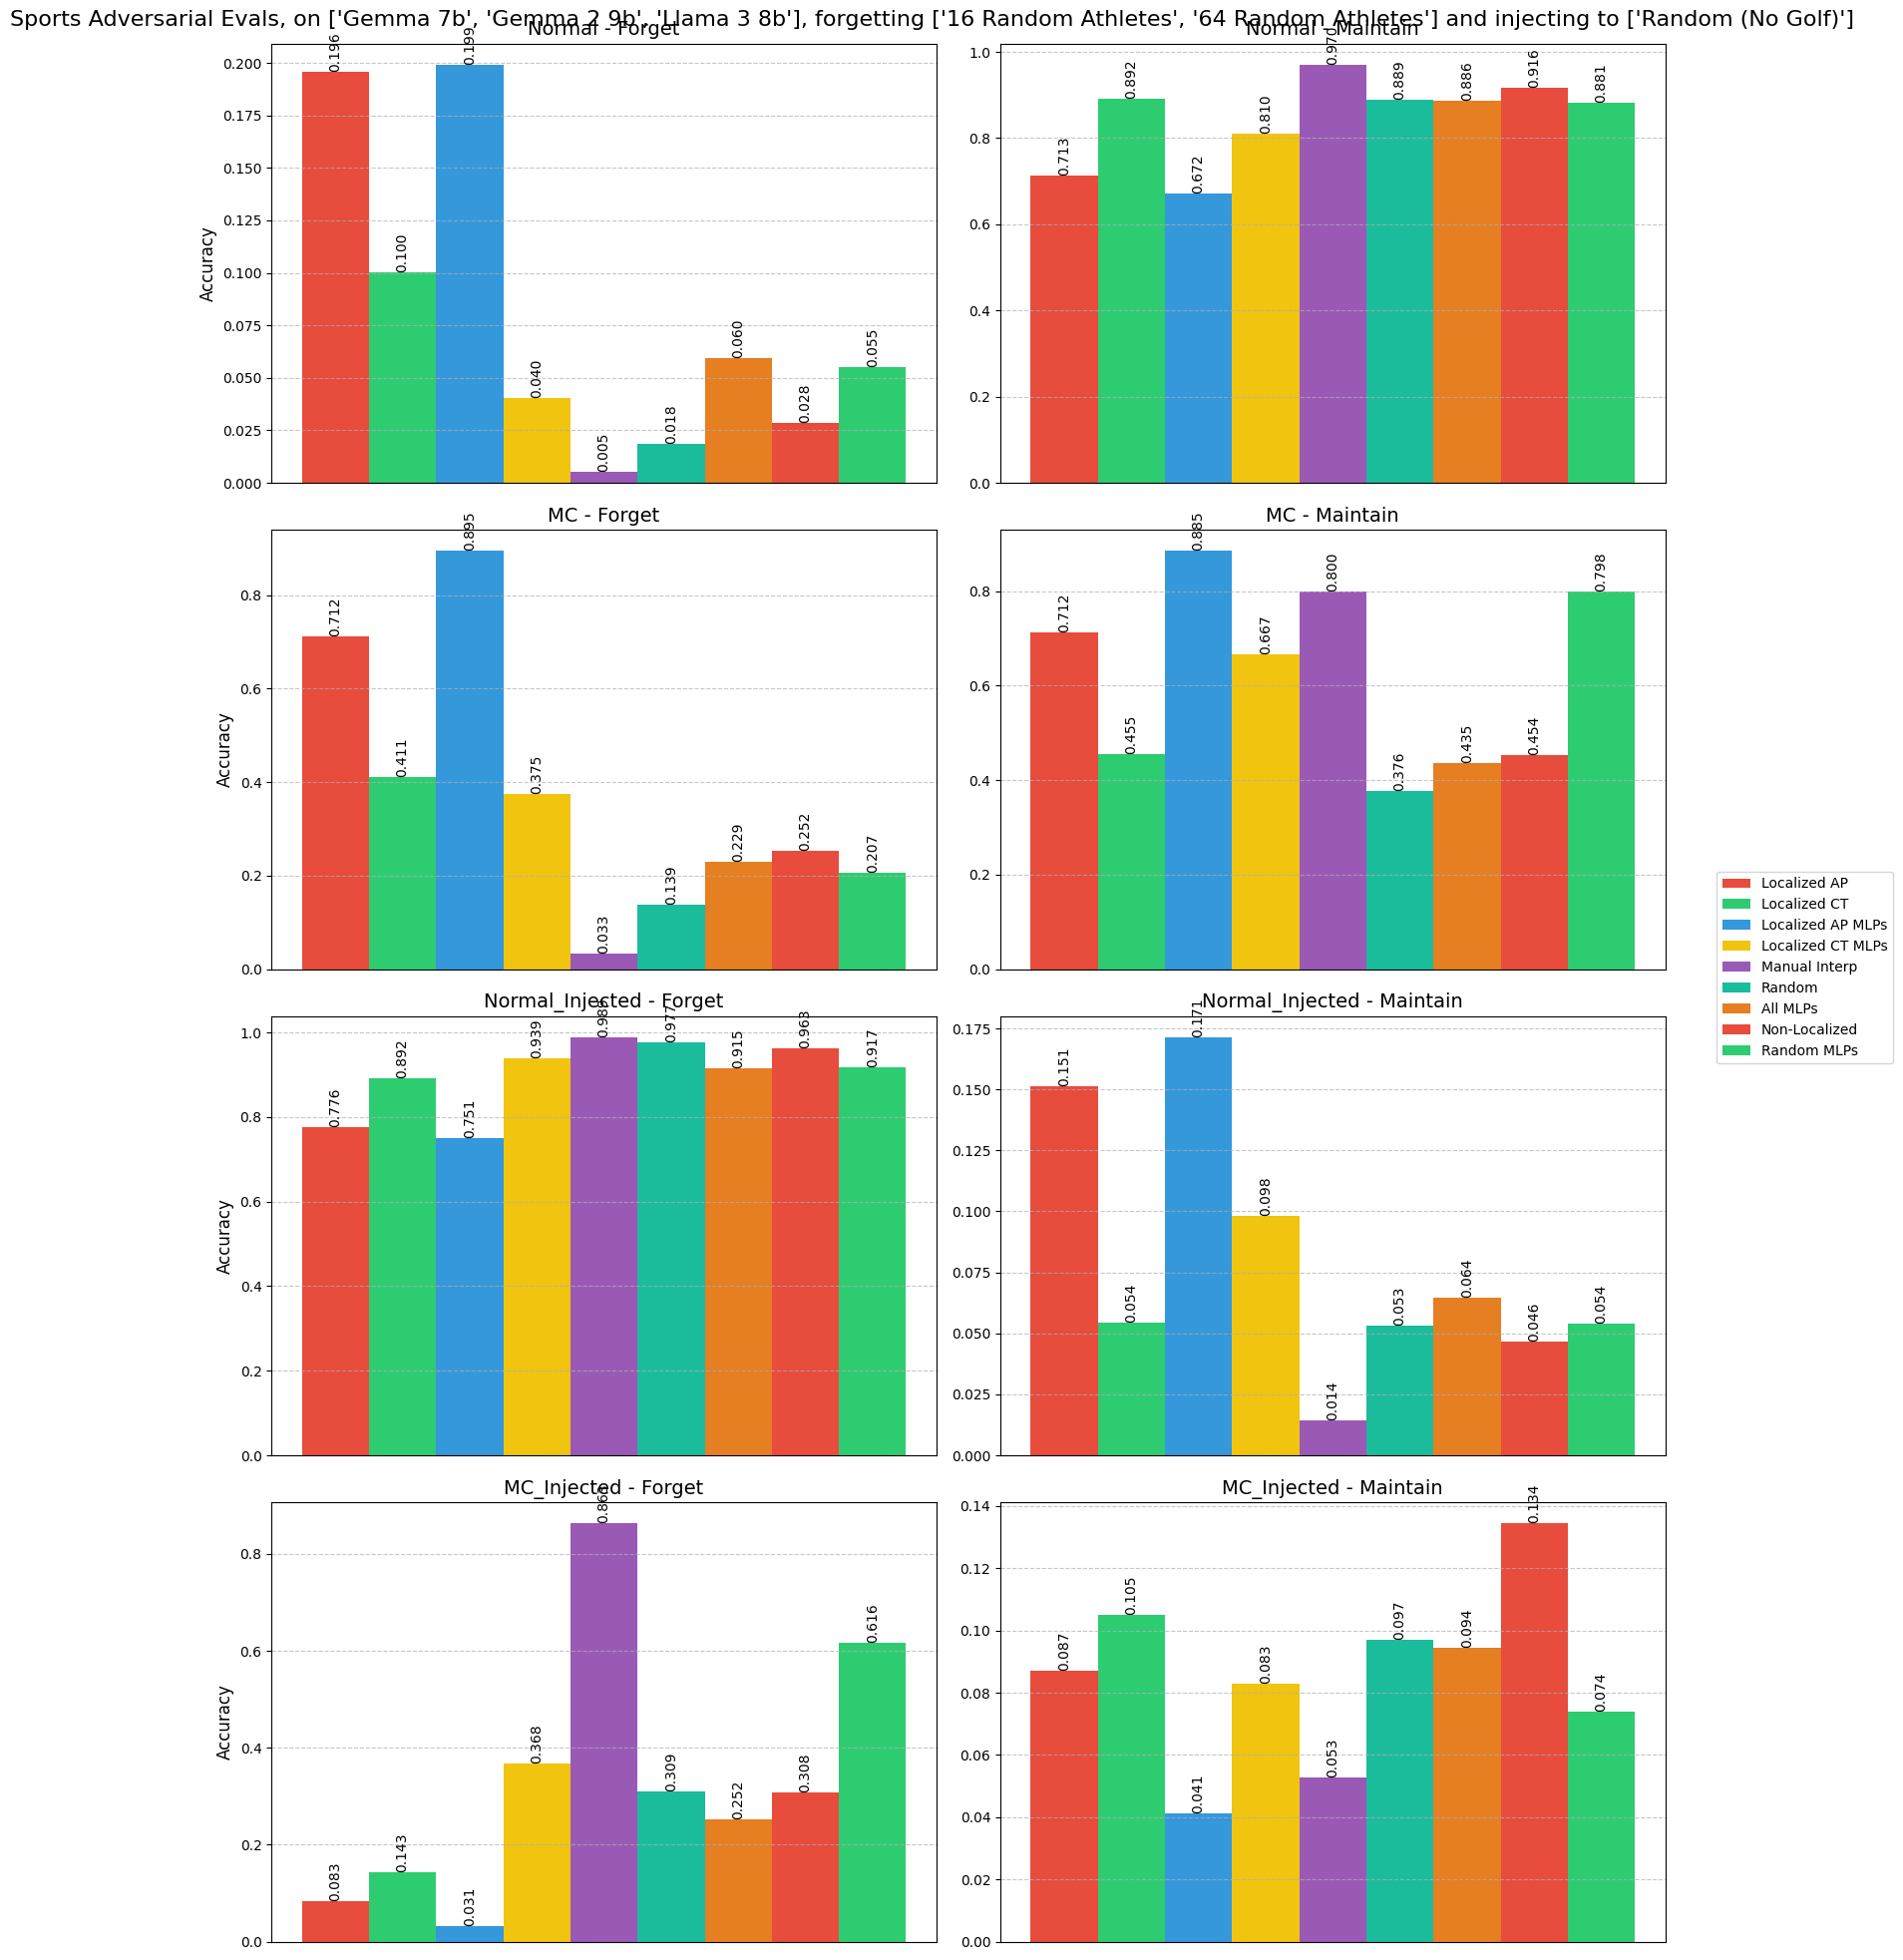

In [16]:
# Create figure and subplots - one row for each eval_type
eval_types = adversarial_evals_df['eval_type'].unique()
fig, axes = plt.subplots(len(eval_types), 2, figsize=(15, 5*len(eval_types)))

loc_types = adversarial_evals_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Single bar position per subplot

# Plot each eval_type in a row
for row_idx, eval_type in enumerate(eval_types):
    data = adversarial_evals_df[adversarial_evals_df['eval_type'] == eval_type]
    
    # Plot Forget Accuracy (left column)
    for idx, loc_type in enumerate(loc_types):
        loc_data = data[data['localization_type'] == loc_type]
        forget_acc = loc_data['forget'].mean()
        
        # Calculate bar position
        bar_position = x + idx*width - (len(loc_types)-1)*width/2
        
        # Create bar
        bar = axes[row_idx, 0].bar(bar_position, forget_acc, width, 
                                  label=loc_type, color=colors[loc_type])
        
        # Add value label
        axes[row_idx, 0].text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
                             ha='center', va='bottom', rotation=90)
    
    # Plot Maintain Accuracy (right column)
    for idx, loc_type in enumerate(loc_types):
        loc_data = data[data['localization_type'] == loc_type]
        maintain_acc = loc_data['maintain'].mean()
        
        # Calculate bar position
        bar_position = x + idx*width - (len(loc_types)-1)*width/2
        
        # Create bar
        bar = axes[row_idx, 1].bar(bar_position, maintain_acc, width, 
                                  label=loc_type, color=colors[loc_type])
        
        # Add value label
        axes[row_idx, 1].text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
                             ha='center', va='bottom', rotation=90)
    
    # Customize each subplot
    axes[row_idx, 0].set_ylabel('Accuracy', fontsize=12)
    axes[row_idx, 0].set_title(f'{eval_type} - Forget', fontsize=14)
    axes[row_idx, 1].set_title(f'{eval_type} - Maintain', fontsize=14)
    
    # Remove x ticks
    axes[row_idx, 0].set_xticks([])
    axes[row_idx, 1].set_xticks([])
    
    # Add grid
    axes[row_idx, 0].grid(True, linestyle='--', alpha=0.7)
    axes[row_idx, 1].grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
plt.suptitle(f"Sports Adversarial Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=16)
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### MMLU Evals

In [17]:
mmlu_evals_df.groupby("localization_type").mean(numeric_only=True)

,mmlu
localization_type,
All MLPs,0.634276
Localized AP,0.640555
Localized AP MLPs,0.642940
Localized CT,0.634406
Localized CT MLPs,0.640222
Manual Interp,0.640555
Non-Localized,0.633813
Random,0.628828
Random MLPs,0.637813


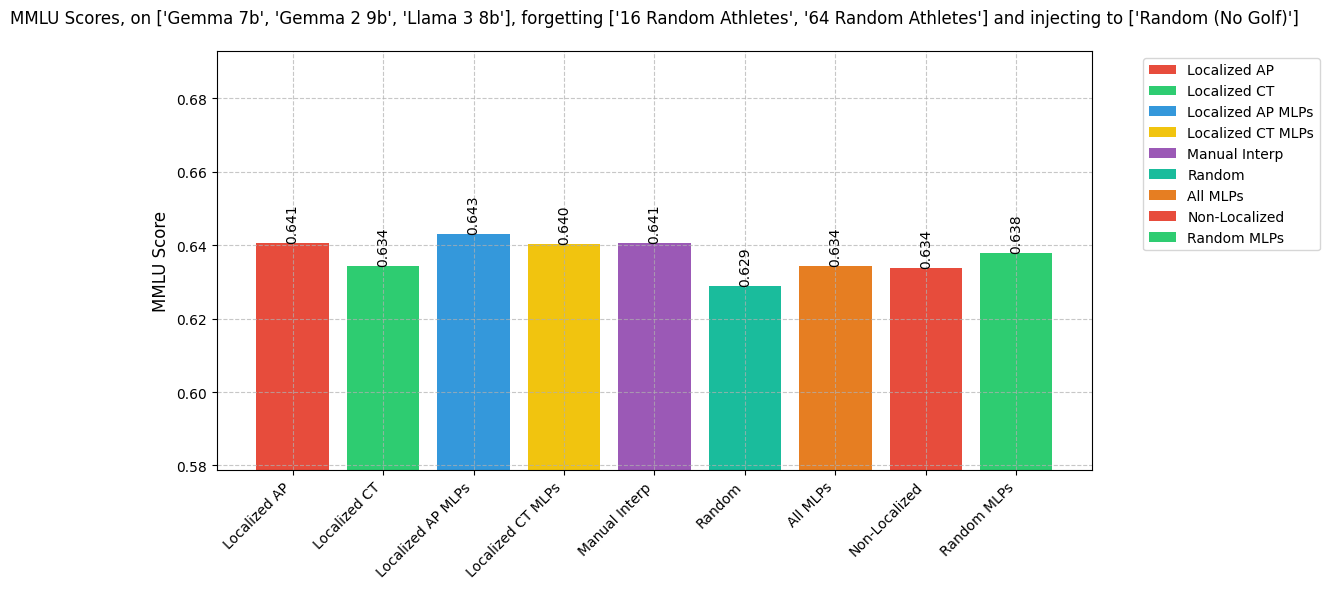

In [22]:
# Create figure
plt.figure(figsize=(12, 6))

# Get data
loc_types = mmlu_evals_df['localization_type'].unique()
mmlu_scores = [mmlu_evals_df[mmlu_evals_df['localization_type'] == loc_type]['mmlu'].mean() 
               for loc_type in loc_types]

# Create bars
bars = plt.bar(range(len(loc_types)), mmlu_scores, color=[colors[loc_type] for loc_type in loc_types])

# Add value labels above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom', rotation=90)

# Customize plot
plt.ylabel('MMLU Score', fontsize=12)
plt.title(f'MMLU Scores, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}', fontsize=12, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis labels
plt.xticks(range(len(loc_types)), loc_types, rotation=45, ha='right')

# Set y-axis limits
min_score = min(mmlu_scores) - 0.05
max_score = max(mmlu_scores) + 0.05
plt.ylim(min_score, max_score)

# Add legend
plt.legend(bars, loc_types, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

plt.show()

### Probing Evals

In [19]:
probing_evals_df.groupby(["localization_type", "layer"])[["forget_ground_truth_acc", "forget_edit_acc"]].mean(numeric_only=True)

forget_ground_truth_acc  forget_edit_acc
localization_type layer                                          
All MLPs          0                     0.460938         0.281250
                  1                     0.463542         0.286458
                  2                     0.559896         0.268229
                  3                     0.539062         0.252604
                  4                     0.596354         0.239583
...                                          ...              ...
Random MLPs       37                    0.023438         0.976562
                  38                    0.007812         0.992188
                  39                    0.007812         0.992188
                  40                    0.000000         1.000000
                  41                    0.000000         1.000000

[378 rows x 2 columns]

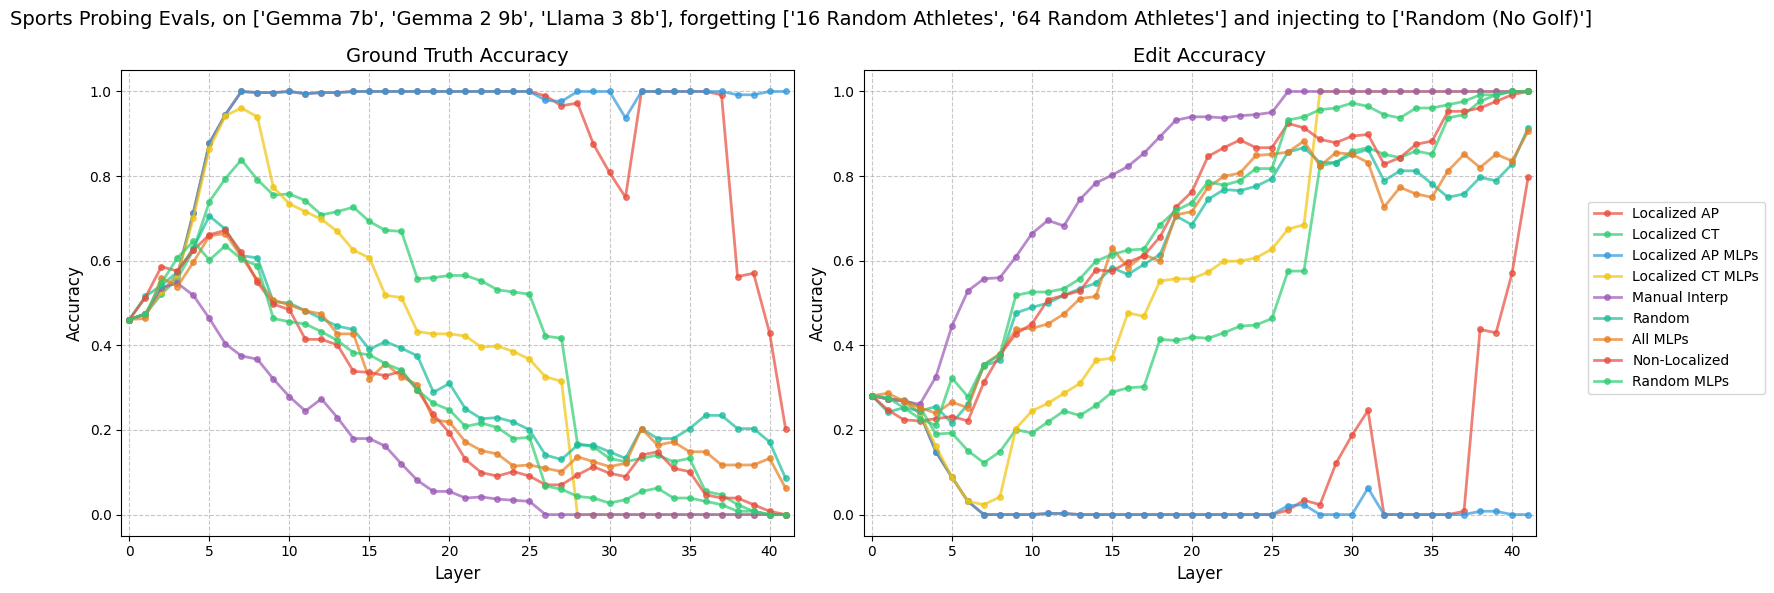

In [20]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = probing_evals_df['localization_type'].unique()
layers = probing_evals_df['layer'].unique()

# Plot Ground Truth Accuracy
for loc_type in loc_types:
    data = probing_evals_df[probing_evals_df['localization_type'] == loc_type]
    ground_truth_vals = [data[data['layer'] == layer]['forget_ground_truth_acc'].mean() 
                        for layer in layers]
    
    ax1.plot(layers, ground_truth_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Plot Edit Accuracy
for loc_type in loc_types:
    data = probing_evals_df[probing_evals_df['localization_type'] == loc_type]
    edit_vals = [data[data['layer'] == layer]['forget_edit_acc'].mean() 
                 for layer in layers]
    
    ax2.plot(layers, edit_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Customize plots
for ax, title in zip([ax1, ax2], ['Ground Truth Accuracy', 'Edit Accuracy']):
    ax.set_xlabel('Layer', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(-0.5, len(layers)-0.5)

plt.suptitle(f"Sports Probing Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=14)
# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

plt.show()

### Softprompt Evals

In [22]:
softprompt_evals_df.groupby(["localization_type"]).mean(numeric_only=True).drop("softprompt_iter", axis=1)

,forget_acc,forget_acc_with_injected,maintain_acc
localization_type,,,
All MLPs,0.355102,0.526110,0.789885
Localized AP,0.603426,0.307308,0.824249
Localized CT,0.564596,0.239072,0.751768
Manual Interp,0.381137,0.529034,0.767339
Non-Localized,0.349004,0.525883,0.788505
Random,0.345366,0.416907,0.483086
Random MLPs,0.653347,0.233679,0.875158


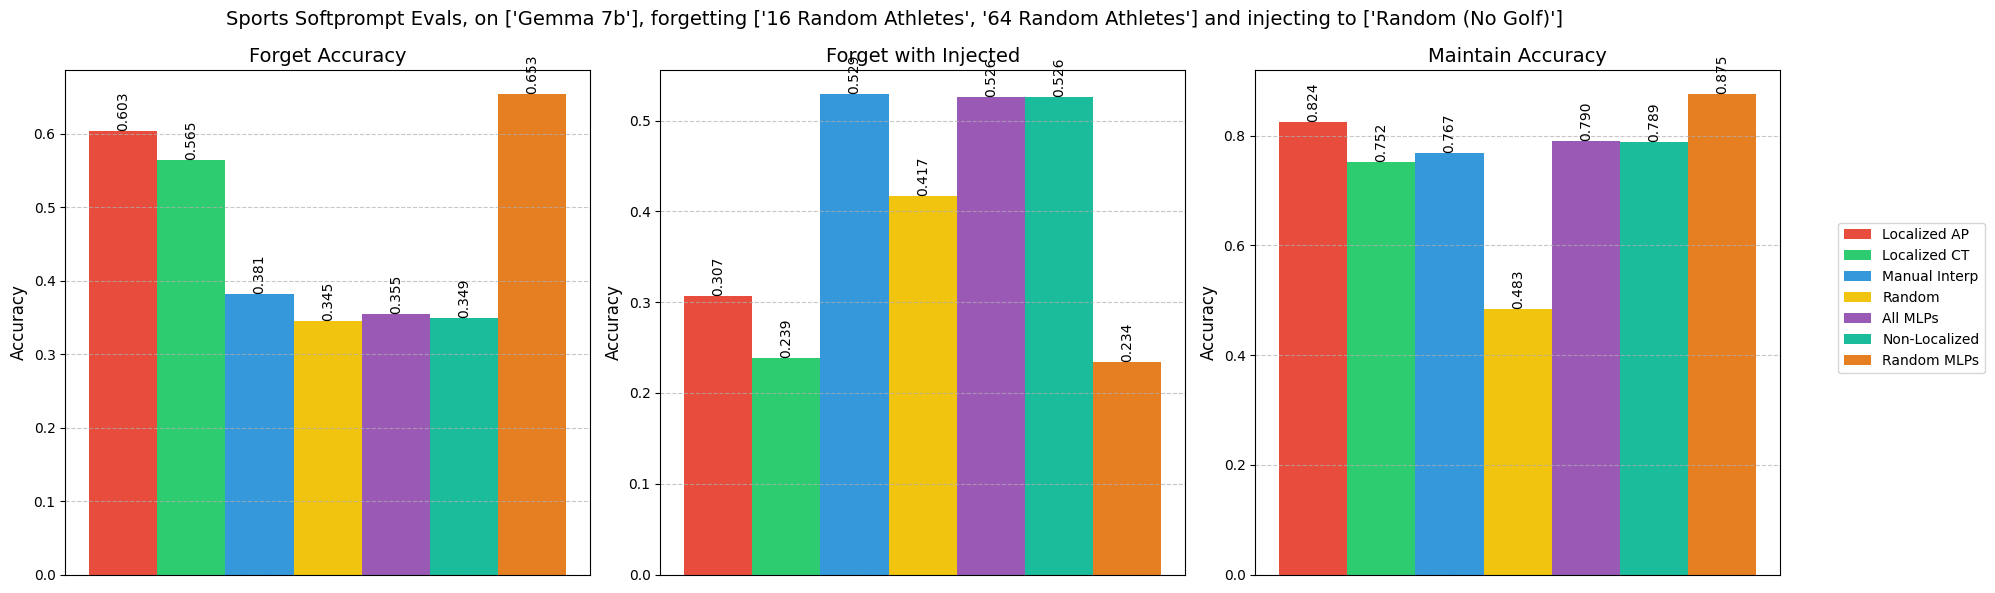

In [24]:
# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

loc_types = softprompt_evals_df['localization_type'].unique()
width = 0.12
x = np.arange(1)  # Single bar position per subplot

# Plot Forget Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    forget_acc = data['forget_acc'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax1.bar(bar_position, forget_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax1.text(bar_position[0], forget_acc, f'{forget_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Forget with Injected Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    forget_injected_acc = data['forget_acc_with_injected'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax2.bar(bar_position, forget_injected_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax2.text(bar_position[0], forget_injected_acc, f'{forget_injected_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Plot Maintain Accuracy
for idx, loc_type in enumerate(loc_types):
    data = softprompt_evals_df[softprompt_evals_df['localization_type'] == loc_type]
    maintain_acc = data['maintain_acc'].mean()
    
    # Calculate bar position
    bar_position = x + idx*width - (len(loc_types)-1)*width/2
    
    # Create bar
    bar = ax3.bar(bar_position, maintain_acc, width, label=loc_type, color=colors[loc_type])
    
    # Add value label
    ax3.text(bar_position[0], maintain_acc, f'{maintain_acc:.3f}',
             ha='center', va='bottom', rotation=90)

# Customize plots
for ax, title in zip([ax1, ax2, ax3], ['Forget Accuracy', 'Forget with Injected', 'Maintain Accuracy']):
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks([])
    ax.grid(True, linestyle='--', alpha=0.7)

# Add single legend to the right
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.suptitle(f"Sports Softprompt Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=14)
# Adjust layout
plt.tight_layout()

plt.show()

### Relearning Evals

In [28]:
relearning_evals_df.groupby(["localization_type", "step"]).mean(numeric_only=True)[["Normal_Injected_forget", "MC_Injected_forget"]]

Normal_Injected_forget  MC_Injected_forget
localization_type step                                            
All MLPs          0                   0.999899            0.350142
                  5                   0.577137            0.128475
                  10                  0.630538            0.140897
                  15                  0.626699            0.148069
                  20                  0.632654            0.153515
Localized AP      0                   0.984131            0.124406
                  5                   0.402305            0.026604
                  10                  0.183036            0.031790
                  15                  0.130014            0.027849
                  20                  0.101035            0.024131
Localized CT      0                   0.965562            0.094049
                  5                   0.429927            0.058344
                  10                  0.136952            0.048026
                  15                  0.061420            0.043272
                  20                  0.035224            0.042304
Manual Interp     0                   0.999994            0.939851
                  5                   0.586066            0.373442
                  10                  0.854035            0.236010
                  15                  0.680349            0.242071
                  20                  0.708735            0.248993
Non-Localized     0                   0.999524            0.218128
                  5                   0.604203            0.163832
                  10                  0.618842            0.153710
                  15                  0.611610            0.137229
                  20                  0.594892            0.138264
Random            0                   0.999978            0.165599
                  5                   0.492062            0.137783
                  10                  0.548047            0.141733
                  15                  0.443421            0.130227
                  20                  0.470545            0.130680
Random MLPs       0                   0.999525            0.089118
                  5                   0.179678            0.110555
                  10                  0.009325            0.095860
                  15                  0.125678            0.110731
                  20                  0.125533            0.111511

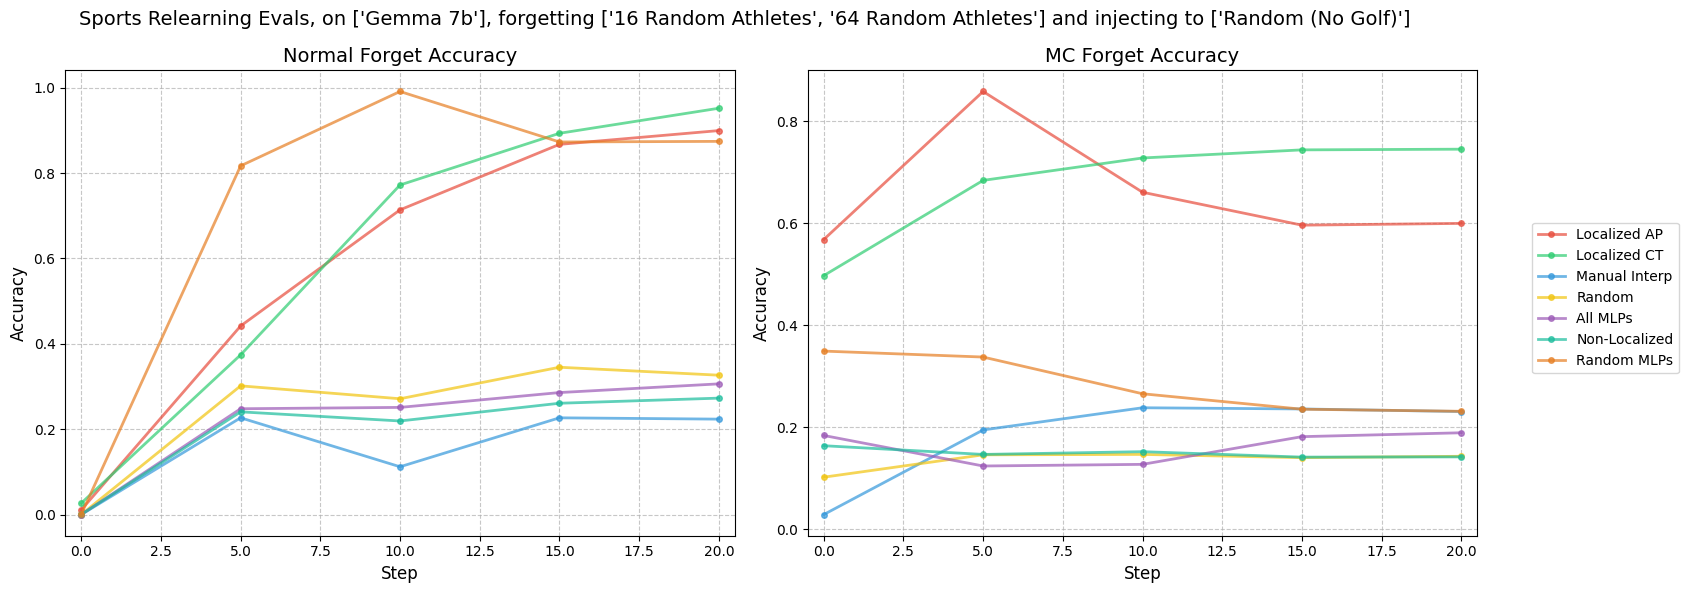

In [34]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

loc_types = relearning_evals_df['localization_type'].unique()
steps = relearning_evals_df['step'].unique()

# Plot Normal Injected Forget
for loc_type in loc_types:
    data = relearning_evals_df[relearning_evals_df['localization_type'] == loc_type]
    normal_forget_vals = [data[data['step'] == step]['Normal_forget'].mean() 
                           for step in steps]
    
    ax1.plot(steps, normal_forget_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Plot MC Injected Forget
for loc_type in loc_types:
    data = relearning_evals_df[relearning_evals_df['localization_type'] == loc_type]
    mc_forget_vals = [data[data['step'] == step]['MC_forget'].mean() 
                        for step in steps]
    
    ax2.plot(steps, mc_forget_vals, 'o-', label=loc_type, 
             color=colors[loc_type], alpha=0.7, markersize=4, linewidth=2)

# Customize plots
for ax, title in zip([ax1, ax2], ['Normal Forget Accuracy', 'MC Forget Accuracy']):
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(-0.5, max(steps)+0.5)

# Add single legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.suptitle(f"Sports Relearning Evals, on {list(model_names.values())}, forgetting {list(forget_splits.values())} and injecting to {list(inject_labels.values())}", fontsize=14)
# Adjust layout
plt.tight_layout()

plt.show()